In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import CCA
from osgeo import gdal

## First I will load the data from the tiffs from old copenhagen

In [34]:
dataset86_453 = gdal.Open(r'udsnit_1986_06_27_band453.tiff')
print(dataset86_453.RasterCount)
band1 = dataset86_453.GetRasterBand(1) # Red channel
band2 = dataset86_453.GetRasterBand(2) # Green channel
band3 = dataset86_453.GetRasterBand(3) # Blue channel
b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()
# These are supposed to be bands 4, 5, and 3, but I also have the rgb image, so I have the same band (3) twice?

3


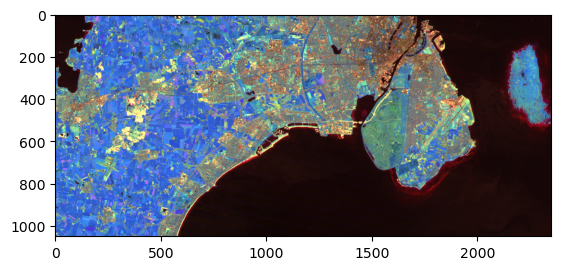

In [35]:
img = np.dstack((b3, b2, b1))#, b4, b5, b6))
min_val = np.min(img)*255
max_val = np.max(img)*255
const = 255/(max_val-min_val)
img = const*img
f = plt.figure()
plt.imshow(img)
c = plt.colorbar
plt.show()

In [20]:
dataset86_color = gdal.Open(r'udsnit_1986_06_27_farve.tiff')
print(dataset86_color.RasterCount)

3


In [25]:
band4 = dataset86_color.GetRasterBand(1) # NIR
band5 = dataset86_color.GetRasterBand(2) # SWIR1
band6 = dataset86_color.GetRasterBand(3) # SWIR2
b4 = band4.ReadAsArray()
b5 = band5.ReadAsArray()
b6 = band6.ReadAsArray()

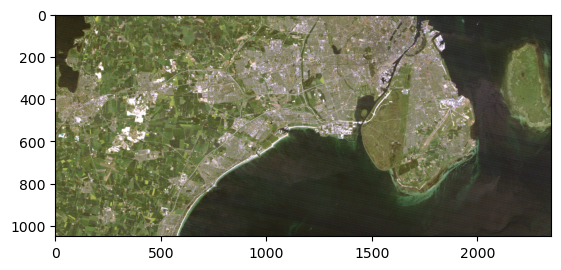

In [27]:
img = np.dstack((b4, b5, b6))#, b4, b5, b6))
min_val = np.min(img)*255
max_val = np.max(img)*255
const = 255/(max_val-min_val)
img = const*img
f = plt.figure()
plt.imshow(img)
c = plt.colorbar
plt.show()

In [28]:
# Putting the bands in a data frame
df_old = pd.DataFrame({'b1': b1.flatten(), 'b2': b2.flatten(), 'b3': b3.flatten(), 'b4': b4.flatten(), 'b5': b5.flatten(), 'b6': b6.flatten()})

# Standardize the data
scaler = StandardScaler()
df_old = scaler.fit_transform(df_old)

# Then I will load the data from the tiffs from new copenhagen

In [36]:
dataset05_453 = gdal.Open(r'udsnit_2005_08_18_band453.tiff')
print(dataset05_453.RasterCount)
band1 = dataset05_453.GetRasterBand(1) # Red channel
band2 = dataset05_453.GetRasterBand(2) # Green channel
band3 = dataset05_453.GetRasterBand(3) # Blue channel
b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()
# These are supposed to be bands 4, 5, and 3, but I also have the rgb image, so I have the same band (3) twice?

3


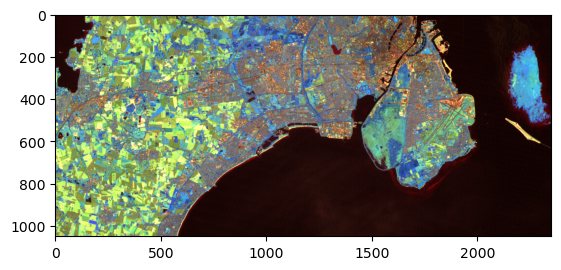

In [37]:
img = np.dstack((b3, b2, b1))#, b4, b5, b6))
min_val = np.min(img)*255
max_val = np.max(img)*255
const = 255/(max_val-min_val)
img = const*img
f = plt.figure()
plt.imshow(img)
c = plt.colorbar
plt.show()

In [39]:
dataset05_color = gdal.Open(r'udsnit_2005_08_18_farve.tiff')
print(dataset05_color.RasterCount)
band4 = dataset05_color.GetRasterBand(1) # NIR
band5 = dataset05_color.GetRasterBand(2) # SWIR1
band6 = dataset05_color.GetRasterBand(3) # SWIR2
b4 = band4.ReadAsArray()
b5 = band5.ReadAsArray()
b6 = band6.ReadAsArray()

3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


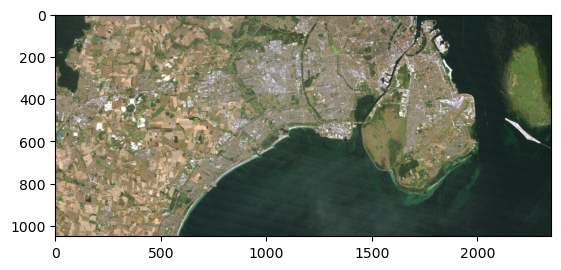

In [40]:
img = np.dstack((b4, b5, b6))#, b4, b5, b6))
min_val = np.min(img)*255
max_val = np.max(img)*255
const = 255/(max_val-min_val)
img = const*img
f = plt.figure()
plt.imshow(img)
c = plt.colorbar
plt.show()

In [41]:
# Putting the bands in a data frame
df_new = pd.DataFrame({'b1': b1.flatten(), 'b2': b2.flatten(), 'b3': b3.flatten(), 'b4': b4.flatten(), 'b5': b5.flatten(), 'b6': b6.flatten()})

# Standardize the data
scaler = StandardScaler()
df_new = scaler.fit_transform(df_new)

## Let's see some of these data

In [44]:
df_old = pd.DataFrame(df_old)
df_new = pd.DataFrame(df_new)
df_old.columns = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6']
df_new.columns = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6']
print(df_old.head(5))
print(df_new.head(5))

         b1        b2        b3        b4        b5        b6
0 -1.123032 -1.190400 -0.988594 -1.191683 -1.408783 -1.173439
1 -1.123032 -1.144487 -0.988594 -1.191683 -1.251832 -1.173439
2 -1.123032 -1.113879 -0.988594 -1.191683 -1.251832 -1.289798
3 -1.123032 -1.098575 -0.988594 -1.191683 -1.408783 -1.289798
4 -1.110777 -1.098575 -0.988594 -1.191683 -1.408783 -1.289798
         b1        b2        b3        b4        b5        b6
0 -1.056057 -1.059778 -0.991656 -1.084372 -1.096446 -0.929979
1 -1.056057 -1.085062 -0.991656 -1.084372 -1.096446 -0.999422
2 -1.086818 -1.135630 -0.991656 -1.084372 -1.243885 -0.999422
3 -1.086818 -1.110346 -1.074701 -1.200098 -1.243885 -0.929979
4 -1.056057 -1.110346 -0.991656 -1.084372 -1.096446 -1.092012


## Performing CCA

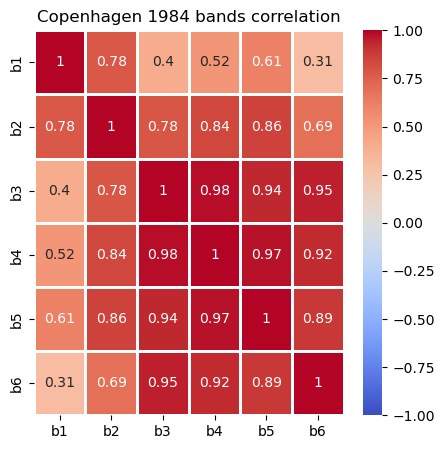

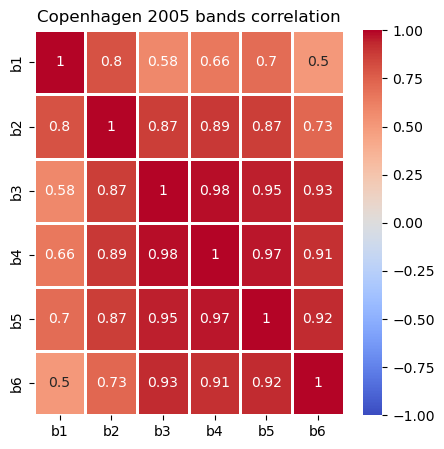

In [50]:
# Let's see if there is a correlation between the bands. This will give us an intuition of what to expect

corr_coeff_old = df_old.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corr_coeff_old, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.title('Copenhagen 1984 bands correlation')
plt.show()

corr_coeff_new = df_new.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corr_coeff_new, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.title('Copenhagen 2005 bands correlation')
plt.show()

In [51]:
n_samples, n_features = df_old.shape
# Choose number of canonical variates pairs
n_comp = 6
# Define CCA
cca = CCA(scale = False, n_components=n_comp)
# Fit the model to the data
cca.fit(df_old, df_new)
# Transform the data to canonical variables
X_c, Y_c = cca.transform(df_old, df_new)


Text(0.5, 1.0, 'Canonical variate correlations')

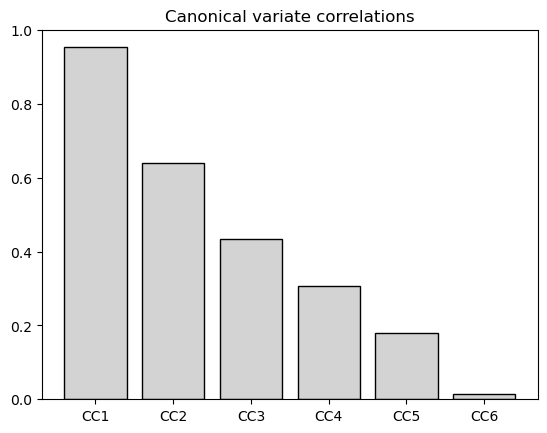

In [57]:
# Let's see if there is any correlation between the canonical variables

comp_corr = [np.corrcoef(X_c[:, i], Y_c[:, i])[1][0] for i in range(n_comp)]
plt.bar(['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'CC6'], comp_corr, color='lightgrey', width = 0.8, edgecolor='k')
plt.title('Canonical variate correlations')

# First, second and third canonical variates pairs are highly correlated

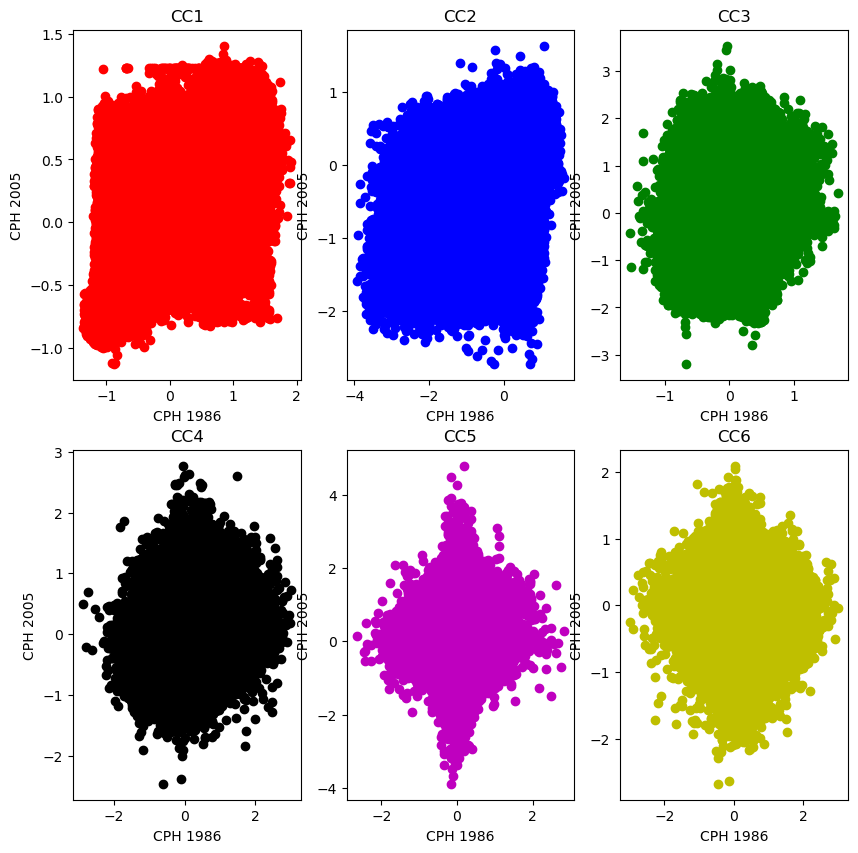

In [60]:
# Let's plot the canonical variates pairs in a scatter plot

fig, ax = plt.subplots(2, 3, figsize=(10, 10))
ax[0,0].scatter(X_c[:, 0], Y_c[:, 0], c='r', label='CC1')
ax[0,0].set_title('CC1')
ax[0,0].set_xlabel('CPH 1986')
ax[0,0].set_ylabel('CPH 2005')
ax[0,1].scatter(X_c[:, 1], Y_c[:, 1], c='b', label='CC2')
ax[0,1].set_title('CC2')
ax[0,1].set_xlabel('CPH 1986')
ax[0,1].set_ylabel('CPH 2005')
ax[0,2].scatter(X_c[:, 2], Y_c[:, 2], c='g', label='CC3')
ax[0,2].set_title('CC3')
ax[0,2].set_xlabel('CPH 1986')
ax[0,2].set_ylabel('CPH 2005')
ax[1,0].scatter(X_c[:, 3], Y_c[:, 3], c='k', label='CC4')
ax[1,0].set_title('CC4')
ax[1,0].set_xlabel('CPH 1986')
ax[1,0].set_ylabel('CPH 2005')
ax[1,1].scatter(X_c[:, 4], Y_c[:, 4], c='m', label='CC5')
ax[1,1].set_title('CC5')
ax[1,1].set_xlabel('CPH 1986')
ax[1,1].set_ylabel('CPH 2005')
ax[1,2].scatter(X_c[:, 5], Y_c[:, 5], c='y', label='CC6')
ax[1,2].set_title('CC6')
ax[1,2].set_xlabel('CPH 1986')
ax[1,2].set_ylabel('CPH 2005')
plt.show()